# <b>Feature Engineering</b>

## **Agenda**

| ID | Name | Country | Age | Member | Score A | Score B | Class |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 7896 | Mark | Canada | 45 | 1 | 180 | 9 | A
| 9865 | Yuze | Japan | | 0 | 165 | 8.5 | B
| 4678 | Becky | USA | 38 | Y | 140 | 6 | B
| 3324 | Mike | 890 | 50 | 0 | 90 | 8.7 | C
| 7896 | Mark | Canada | 45 | 1 | 180 | 9 | A
| 7896 | Jose | Mexico | 98 | 0 | 60.5 | 5 | A
| 8962 | Emma | Germany | 39 | 1 | 140 | 8 | B



Issues
- duplicate data (mark) `drop_duplicates()`
- unnecessary column ID `drop()`
- missing info for age `dropna()` or `fillna()` **imputation**
- Inconsistent data format in Member column/feature (Y instead of 1) - maybe due to a data entry error - numeric vs alphabetic indicators **encoding**
- categorical variables - country column requires **encoding**
- possible outlier for age **outlier treatment**
- Country has a mix of num and alph. e.g. 890 does not belong in the column `replace()`
- Score A and Score B have different scales. **scaling or normalization**
- Data Quality issue: Jose and Mark share the same ID (build new column with more unique ID by concatenating 2 fields e.g.'7896Mark')
- Bin the data

## **Features**

* In most cases, machine learning algorithms are fed a collection of numeric examples that are stacked on top of each other to form a two-dimensional feature matrix.

* Understanding the task of these features is critical when doing analysis and machine learning on the dataset.

* Since the algorithms create their own internal transformations, deep learning features are normally simple.

* Feature engineering is needed for the majority of other use cases in order to translate data into a machine learning-ready format.

* The features chosen are critical for both the data's interpretability and the model's performance.

* A precise machine learning framework cannot be built without feature engineering.

## <b> What Is Feature Engineering?</b>

**Feature Engineering: The Magic Touch for AI and ML Models**

* Imagine you're training a model to predict if someone will click on an ad. The raw data you have might be things like age, location, income, and website visited. These are your features, the basic building blocks your model uses to make its predictions.

* Feature engineering is like refining these building blocks. It's the process of transforming and combining raw data to create new features that are more informative and relevant to your specific problem. Think of it as giving your model sharper, more polished tools to work with.

* It is the process of **creating new features** from raw data using domain knowledge and technical expertise to make the machine learning algorithms perform better.

* It is one of the fundamental concepts of machine learning because:
   - Boosts Model Performance
   - Reduces Overfitting:
      - Raw data can be noisy and complex, leading models to memorize patterns specific to that data, instead of learning generalizable rules. Feature engineering removes noise and redundancy and creates features that capture the essence of the data, preventing overfitting and improving model generalizability.
      - 
   - Improves Computational Performance
   - Uncovers Hidden Insights

* Every new resource must enhance the performance in some way; otherwise, it would have the opposite effect, worsening the final outcome. When this happens, we must use feature selection instead of feature engineering.

* Acording to Andrew Ng, "Coming up with features is difficult, time-consuming, requires expert knowledge."

* According to Pedro Domingos, feature engineering is the art of coming up with new features with more predictive power using:

   - Technical Experience
   - Domain expertise
   - Empirical processes

* The following are some of the most important components of feature engineering:
  1. Imputation (handing missing values)
  2. Handling Outliers (removing/replacing outliers)
  3. Binning (converting continuous values into bins)
  4. Encoding (transforming categorical data to numerical)
  5. Grouping Operations (Data Aggregation)
  6. Scaling (normalize the range of independent variables/features)
  7. Encoding: converting categorical variables into numerical
  8. Dimensionality Reduction


### <b> Applying Domain Expertise </b>

Domain expertise or domain knowledge is nothing but expertise in a particular field, such as Education, Healthcare, Consumer Goods, and Retail. 
A domain expert is someone who is not related to the technology aspect but has in-depth knowledge about the particular industry, how it is shaping up, the trends, and the things that might impact the industry.

For example, you are called in to develop a particular application for a consumer goods company, specifically an apparel and footwear one.
The application that you build has to align to the industry and its various facets, and you being a technology expert wouldn't know much about it. This is where a domain expert will come in and explain how that industry works and what would be the best way to have the application built.

## **Imputation**

**What is Imputation?** </br>
The replacement of missing or inconsistent data elements with approximated values is known as imputation in data. It is intended for the substituted values to produce a data record that passes edits.

**How do you impute missing values in data?**</br>
The statistics (mean, median, or most common) of each row where the missing values are present can be used to impute missing values, or they can be replaced with a constant value.

#### Basic Techniques
 
For numerical:
- Mean/Median/Mode Imputation
- Arbitrary

For categorical:
- Mode (most frequent value)
- Add “Missing” as a text category

In [ ]:
#Numerical - mean
from sklearn.impute import SimpleImputer

# for normal distributions
imputer = SimpleImputer(strategy='mean')

# for skewed distibution
imputer = SimpleImputer(strategy='median')

# for normal distribution (low skew)
# Imputing with most frequent / mode value
imputer = SimpleImputer(strategy='most_frequent') 

# Fit and transform. Fit is an important method in ML. It will learn parameters and save them 
# # and when you transform, it'll apply paramters to do the transform 
imputer.fit(X_train)
X_train = imputer.transform(X_train)

# Arbitrary Imputation
imputer = SimpleImputer(strategy='constant', fill_value=999)

**When to Use**
- Data is missing at random. There's no relationship between your values and missing ones
- Missing data would look like most of your observations (they're not outliers)

**Pros**
- Easy to implement
- Fast
- Can be used in production pipeline (cost effective)

**Cons**
- Possibility of distorting the data distribution (variance and covariance). The more missing values you have, the higher the distortion.
- It only works on a column level. So, it doesn't factor in the correlations between features.
- Mean and median cannot be used on categorical features
- mode only works effectively with categorical features

**Note** Mode works well with categorical features

#### Example

In [13]:
import pandas as pd
import numpy as np
 
students = {
    'Name' : ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd'],
    'Score' : [40, np.NaN, 44, np.NaN, 26, 39, 42, np.NaN],
    'University' : ['UTC', np.NaN, 'MSU', 'MIT', 'CalTech', 'CalTech', 'CalTech', 'MSU'],
}
  
# creating a Dataframe object
 
df = pd.DataFrame(students)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,NaN
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU


In [6]:
print(df['Score'].median())
print(df['Score'].mean(skipna=True))

40.0
38.2


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') #missing_values=np.NaN
 
df['Score'] = imputer.fit_transform(df['Score'].values.reshape(-1,1)) #you have to reshape to convert array from row to col

df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,40.0,CalTech
2,John,44.0,MSU
3,Amy,40.0,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,None
6,Kelly,42.0,CalTech
7,Todd,40.0,None


In [39]:
#another approach - no SkLearn
df['Score'].fillna(df['Score'].mean(skipna=True), inplace=True)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,CalTech
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,None
6,Kelly,42.0,CalTech
7,Todd,38.2,None


In [34]:
# imputing categorical variables
imputer = SimpleImputer(missing_values='None', strategy='most_frequent')
df['University'] = imputer.fit_transform(df['University'].values.reshape(-1,1))[:,0]
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,40.0,CalTech
2,John,44.0,MSU
3,Amy,40.0,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,40.0,CalTech


#### Dropping Missing Values

In [10]:

students = {
    'Name' : ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd'],
    'Score' : [40, np.NaN, 44, np.NaN, 26, 39, 42, np.NaN],
    'University' : ['UTC', np.NaN, 'MSU', 'MIT', 'CalTech', 'CalTech', 'CalTech', 'MSU'],
}
  
# creating a Dataframe object
 
df = pd.DataFrame(students)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,NaN
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,None
6,Kelly,42.0,CalTech
7,Todd,NaN,None


In [11]:
#using dropna
df.dropna(axis=0)

,Name,Score,University
0,Mark,40.0,UTC
2,John,44.0,MSU
4,Steve,26.0,CalTech
5,Ally,39.0,None
6,Kelly,42.0,CalTech


In [15]:
#using dropna with threshold to only remove rows with more than 2 NaN
df.dropna(axis=0, thresh=2)

,Name,Score,University
0,Mark,40.0,UTC
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU


**Assumptions**
- Data is missing at random. There's no relationship between your values and missing ones
- Missing data represents a small portion of your overall total data points (5%)

**Pros**
- Easy to implement
- No data manipulation required
- Preserves distributions


**Cons**
- A lot of data/observations can be discarded if there is a high percentage of missing data
- Can create a biased datasete if your dropped elements had valuable info

#### Advanced Techniques

**Imputation Using k-NN** </br>
- The k nearest neighbours is an algorithm that is used for simple classification. 
- The algorithm uses ‘feature similarity’ to predict the values of any new data points. 
- This means that the new point is assigned a value based on how closely it resembles the points in the training set. 
- This can be very useful in making predictions about the missing values by finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood.

In [9]:
import numpy as np
from sklearn.impute import KNNImputer

X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
X

[[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]

In [10]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [ ]:
#example
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(train.values, k=30)

**How Does it Work?**</br>
1. It creates a basic mean impute then uses the resulting complete list to construct a KDTree. 
2. It uses the resulting KDTree to compute nearest neighbours (NN). 
3. It finds the k-NNs, it takes the weighted average of them.

**Extrapolation and Interpolation**</br>
It tries to estimate values from other observations within the range of a discrete set of known data points.

**What is the difference between interpolation and imputation?**</br>
While imputation replaces missing data for the column's mean, interpolation is a sort of estimation that creates data points within the range of a discrete set of existing data points.

**Linear Interpolation**</br>
The linear method ignores the index and treats missing values as equally spaced, and finds the best point to fit the missing value after previous points. If the missing value is at the first index, then it will leave it as Nan. let’s apply dataframe.interpolate to our data frame.

In [44]:
import pandas as pd
# Creating the dataframe
df = pd.DataFrame({"A":[12, 4, 7, None, 2],
                   "B":[None, 3, 57, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 6]})
df

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,3.0,16.0,3.0
2,7.0,57.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,2.0,NaN,8.0,6.0


In [46]:
df[['C']].interpolate(method ='linear', limit_direction ='forward')

,C
0,20.0
1,16.0
2,9.5
3,3.0
4,8.0


Additional resources: https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/

## Outlier Treatment


**Data Set Characteristics:**  

Number of Instances: 506 

Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
boston_df = pd.read_csv('DataWranglingDataset/boston_sklearn.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Alternative Method Using URL**

In [24]:
#alternative method
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [40]:
#apply horizontal stacking to glue both arrays side by side
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
# to just get the target
target = raw_df.values[1::2, 2]
boston_df = pd.DataFrame(data)
boston_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [41]:
#get col headers 
raw_cols = pd.read_csv(data_url, sep="\t", skiprows=range(0, 7), nrows=14, header=None)
raw_cols

,0
0,CRIM per capita crime rate by town
1,ZN proportion of residential land zoned...
2,INDUS proportion of non-retail business ac...
3,CHAS Charles River dummy variable (= 1 if...
4,NOX nitric oxides concentration (parts p...
5,RM average number of rooms per dwelling
6,AGE proportion of owner-occupied units b...
7,DIS weighted distances to five Boston em...
8,RAD index of accessibility to radial hig...
9,TAX full-value property-tax rate per $10...


results above can work as a data dictionary

In [42]:
raw_cols[0].str.split().str.get(0)

0        CRIM
1          ZN
2       INDUS
3        CHAS
4         NOX
5          RM
6         AGE
7         DIS
8         RAD
9         TAX
10    PTRATIO
11          B
12      LSTAT
13       MEDV
Name: 0, dtype: object

In [43]:
boston_df.columns = raw_cols[0].str.split().str.get(0)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [44]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

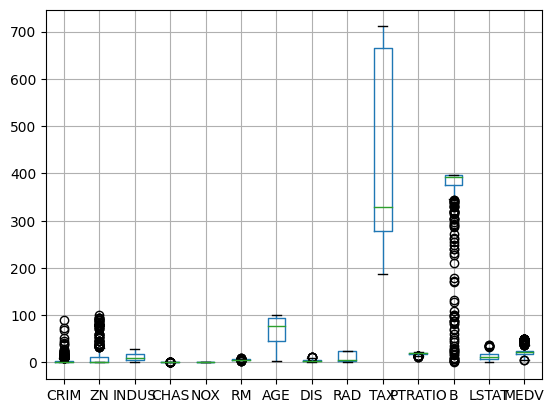

In [45]:
boston_df.boxplot()

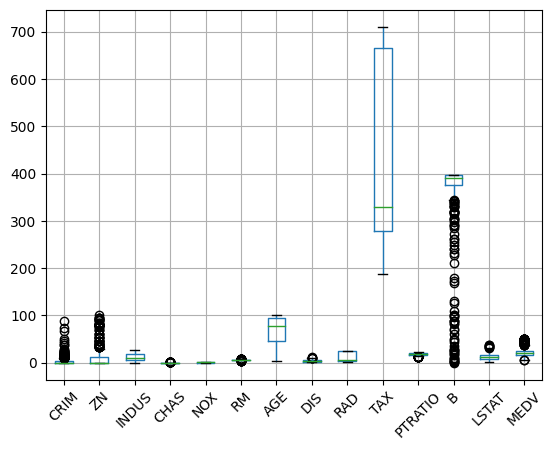

In [46]:
#let's fix the rotation
import matplotlib.pyplot as plt
boston_df.boxplot(rot=45)
plt.show()

**Observations:**

- Since the values are different from each other, it is not right to put every column in the same scale of measurement
- Let's use Seabron this time to get a separate plot and axes for each measure

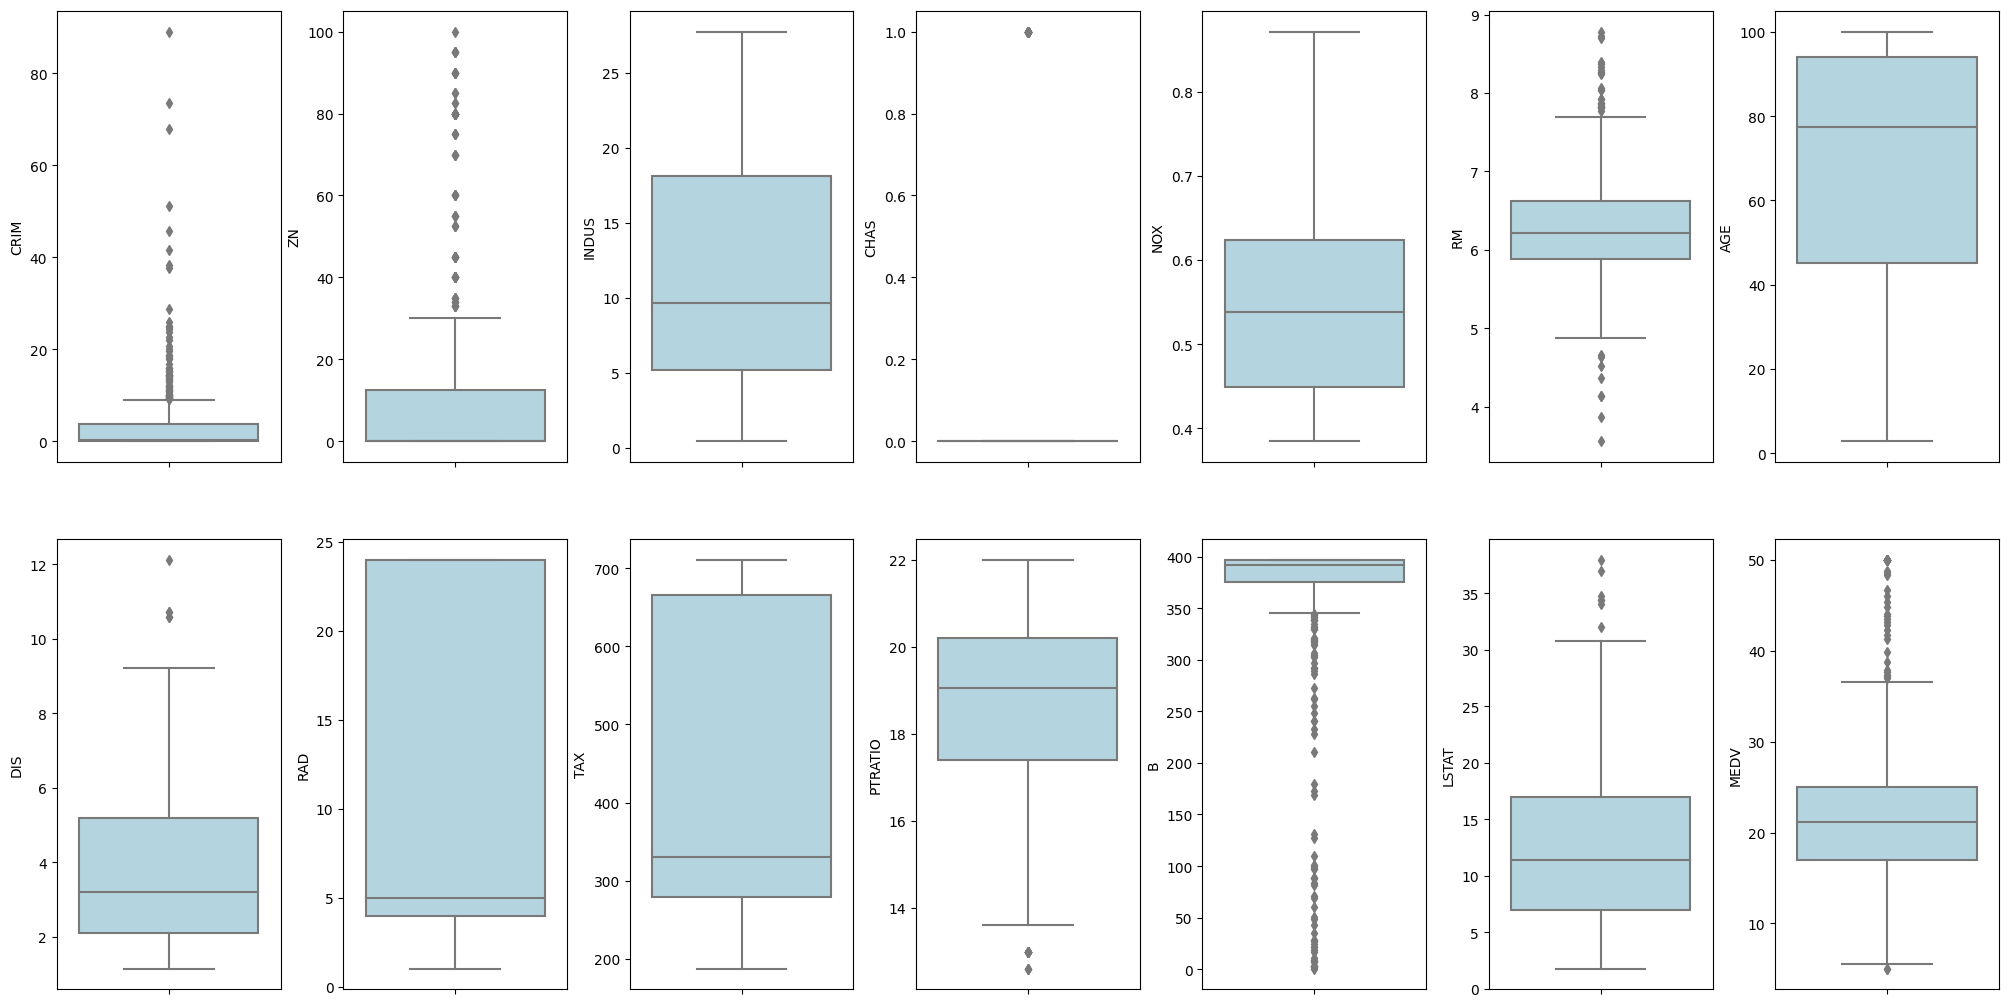

In [3]:
import seaborn as sns
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_df.items():
    sns.boxplot(y=k, data=boston_df, ax=axs[index], color='lightblue')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

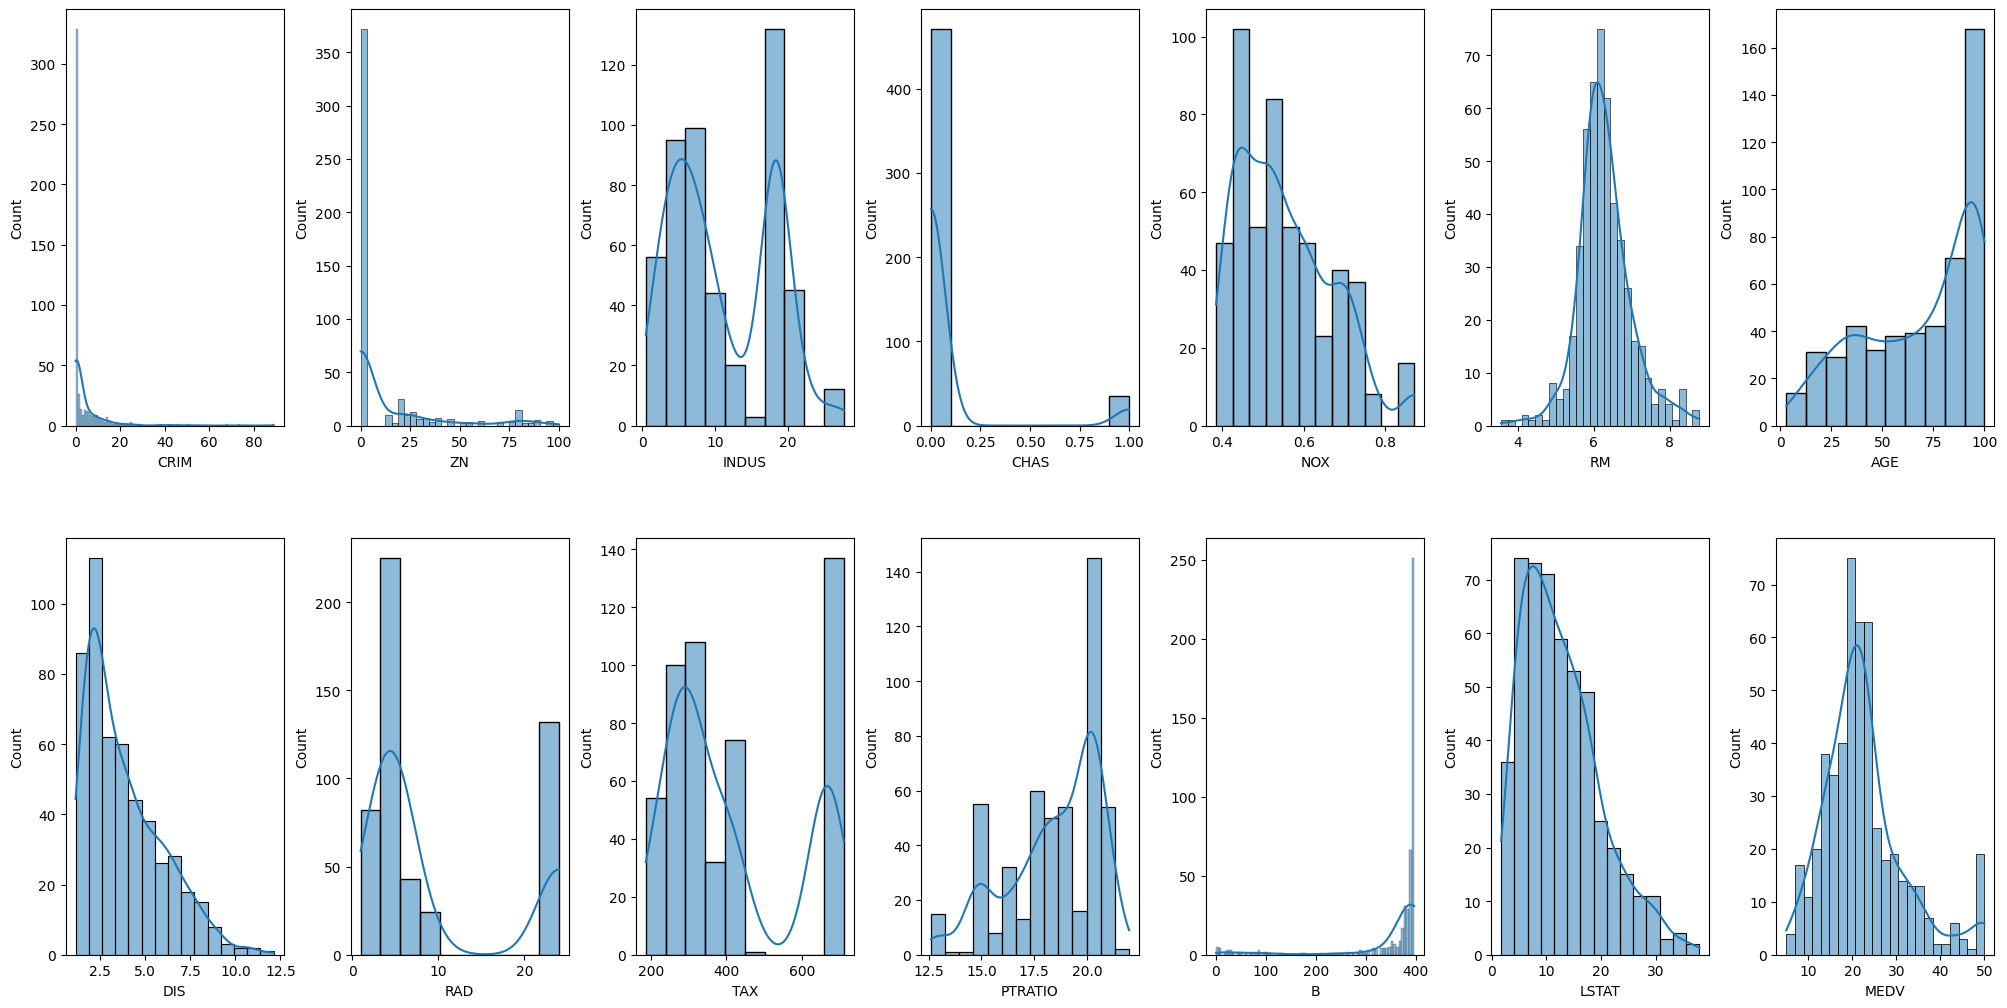

In [9]:
#we can use the same method to do histplot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_df.items():
    sns.histplot(v, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

 **Obeservation:**
- The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. 
- Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have normal or bimodel ditribution of data except CHAS (which is a discrete variable 0 or 1).

#### **IQR (Interquartile range )** Technique for Outlier Treatment

![boxplot](https://miro.medium.com/max/8100/1*NRlqiZGQdsIyAu0KzP7LaQ.png)

In [12]:
def outlier_treatment(col):
    sorted(col) #only needed if you are using an older version of the numpy library
    Q1,Q3 = np.percentile(col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

#### **Observations:**

- In this technique, we divide our dataset under percentiles like 25th  and 75th of a sample

- After that, we find the IQR between these two percentiles

- Now, to remove the outliers, we calculate the lower and upper range by using the given formula

- All the values which are beyond these ranges are considered outliers and must be removed

In [13]:
lower_range,upper_range = outlier_treatment(boston_df['MEDV'])
print("Lower Range:",lower_range)
print("Upper Range:",upper_range)

Lower Range: 5.0624999999999964
Upper Range: 36.962500000000006


In [74]:
### Let us show the values which are beyond upper and lower range in our dataset
upper_boston_df = boston_df[boston_df["MEDV"].values > upper_range]
upper_boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0.0,0.605,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0


#### Drop Outlier Rows

In [15]:
#another dropping outliers technqiue

# if you want to grab the outliers in lower range
mask = boston_df['MEDV'] < lower_range
lower_MEDV = boston_df[mask]
lower_MEDV

#if you want to get rid of outliers from lower range
mask = boston_df['MEDV'] > lower_range
MEDV_no_lower_outliers = boston_df[mask]

#to get full data without outliers then use combined filter to get values that are over lower range and under upper range
mask3 = (boston_df['MEDV'] > lower_range) & (boston_df['MEDV'] < upper_range)
MEDV_no_outliers = boston_df.loc[mask3]
MEDV_no_outliers.shape

(466, 14)

Text(0.5, 1.0, 'After Outlier Treatment')

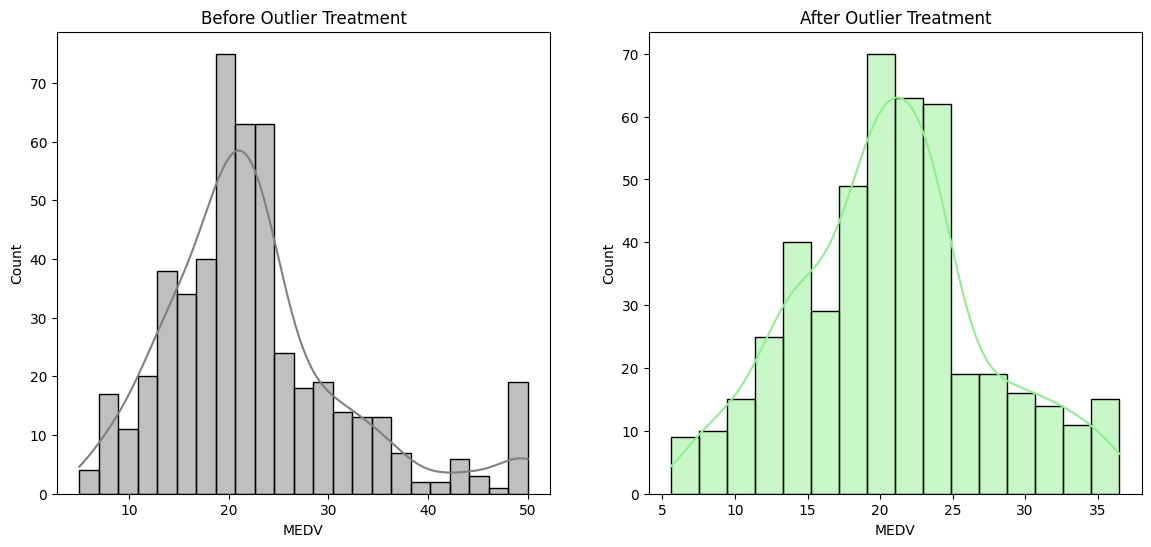

In [24]:

fig, axs =plt.subplots(ncols=2, nrows=1, figsize=(14,6)) 
axs = axs.flatten()
sns.histplot(x=boston_df['MEDV'], ax=axs[0], color='grey', kde=True)
axs[0].set_title('Before Outlier Treatment')
sns.histplot(x=MEDV_no_outliers['MEDV'], ax=axs[1], color='lightgreen', kde=True)
axs[1].set_title('After Outlier Treatment')


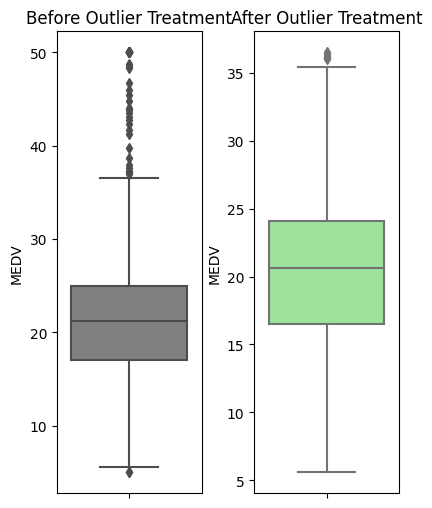

In [30]:

fig, axs =plt.subplots(ncols=2, nrows=1, figsize=(4,5)) 
axs = axs.flatten()
sns.boxplot(y=boston_df['MEDV'], ax=axs[0], color='grey')
axs[0].set_title('Before Outlier Treatment')
sns.boxplot(y=MEDV_no_outliers['MEDV'], ax=axs[1], color='lightgreen')
axs[1].set_title('After Outlier Treatment')
plt.tight_layout(pad=0.4)

In [31]:
MEDV_no_outliers['MEDV'].describe()

count    466.000000
mean      20.719099
std        6.451416
min        5.600000
25%       16.500000
50%       20.600000
75%       24.075000
max       36.500000
Name: MEDV, dtype: float64

- looks like our outlier treatment did a good job of making the distribution for MEDV as symmetrical as possible
- we need to check if dropping outliers negatively impacted the distribution of the rest of columns

CHecking the Skewness of the data

In [90]:
boston_df.skew(axis = 0, skipna = True)

0
CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

<Axes: >

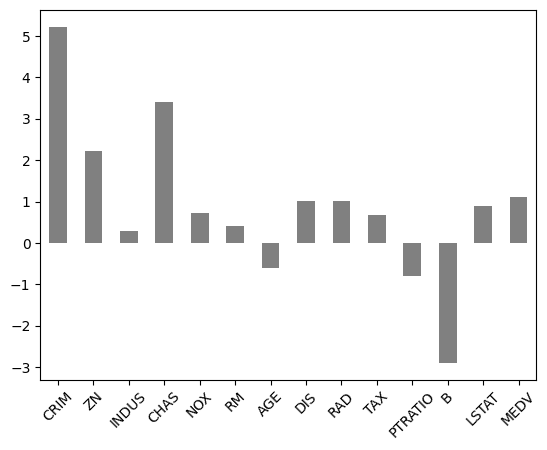

In [32]:
boston_df.skew(axis = 0, skipna = True).plot(kind='bar',rot=45, color='grey')

<Axes: >

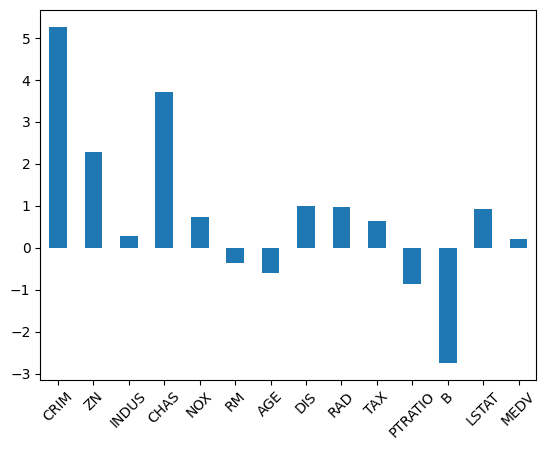

In [36]:
#with no outliers in MEDV
MEDV_no_outliers.skew(axis = 0, skipna = True).plot(kind='bar',rot=45)

In [ ]:
boston_df.skew().plot()
df_no_outliers.skew().plot()

Compare the 2 charts and check if removing outliers made the other columns more skewed

- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed


# Using Z-Score for Stand

In [14]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/HousePrices.csv')

Here, we will standardize the data
using the Z-score, where the new value is calculated by the subtracting the average value from the current value and dividing this by the standard deviation.

Before calculating the outliers in the **price** column, let's first create the Z-score for the prices.

- Import Z-score from scipy.stats
- Calculate the Z-scores for the __Price__ column, and add it to the DataFrame

![z](https://clavelresearch.files.wordpress.com/2019/03/z-score-population.png)

In [15]:
df['zscore-price'] = zscore(df['price'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,zscore-price
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'zscore-price'}>]], dtype=object)

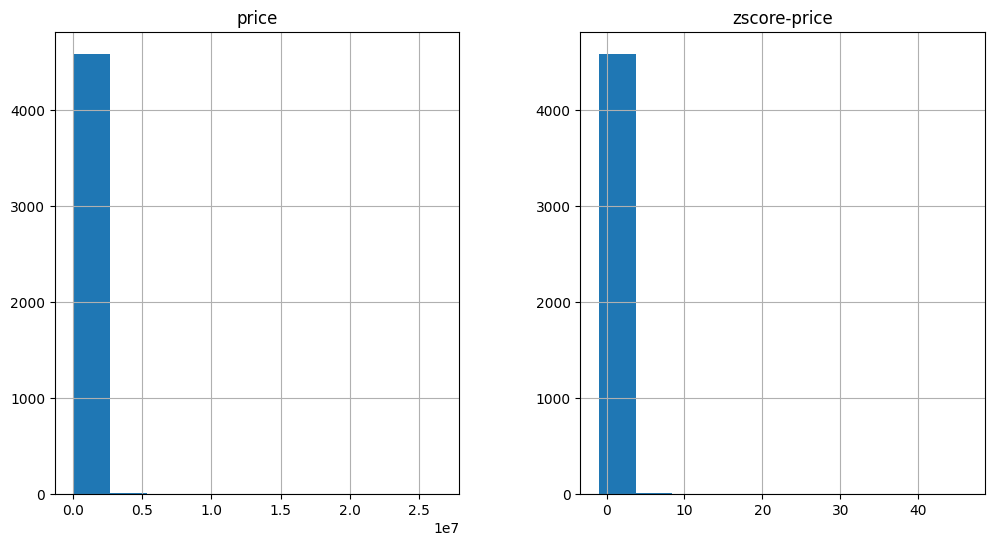

In [16]:
df[['price','zscore-price']].hist(figsize=(12,6))

<Axes: xlabel='price', ylabel='Count'>

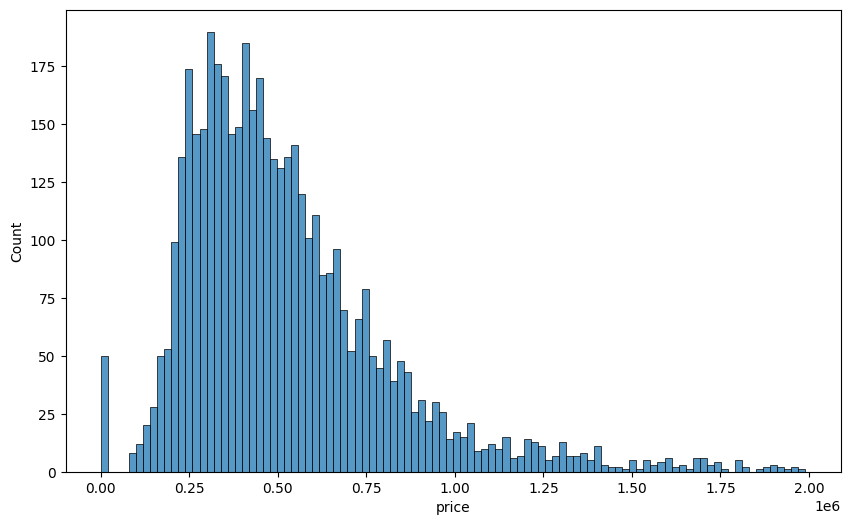

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(data=df[df['price']<2000000],x='price', bins=100)

**Creating a new column to detect outliers**
- Set a threshold for detecting outliers as 2
- Mark outliers in the __Outliers__ column of the DataFrame using the calculated Z-scores

In [20]:
threshold = 2
df['outliers'] = np.where((df['zscore-price'] - threshold > 0), True, np.where(df['zscore-price'] + threshold < 0,True,False))
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,zscore-price,outliers
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864,False
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598,True
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424,False
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071,False
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482,False


<Axes: xlabel='price', ylabel='Count'>

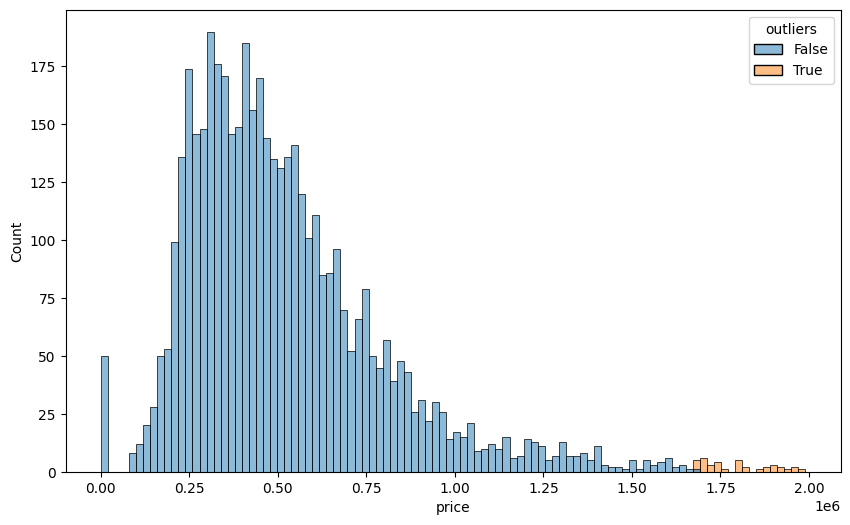

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=df[df['price']<2000000],x='price', bins=100, hue=df['outliers'])

In [22]:
# dropping outliers
#df.drop((df[df['outliers']==True]).index,inplace = True)
mask = df['outliers'] == False
df_no_outliers = df[mask]
df_no_outliers.shape


(4513, 20)

<Axes: xlabel='price', ylabel='Count'>

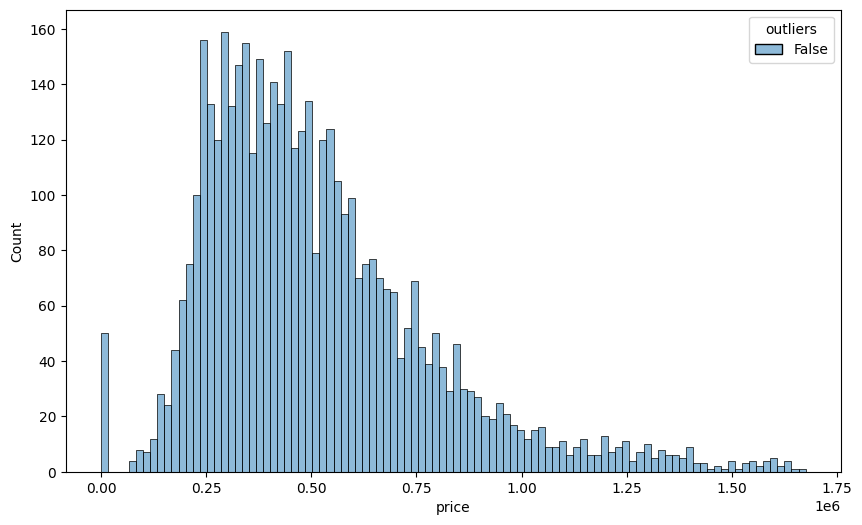

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(x=df_no_outliers['price'], bins=100, hue=df_no_outliers['outliers'])

Text(0.5, 1.0, 'after outlier treatment')

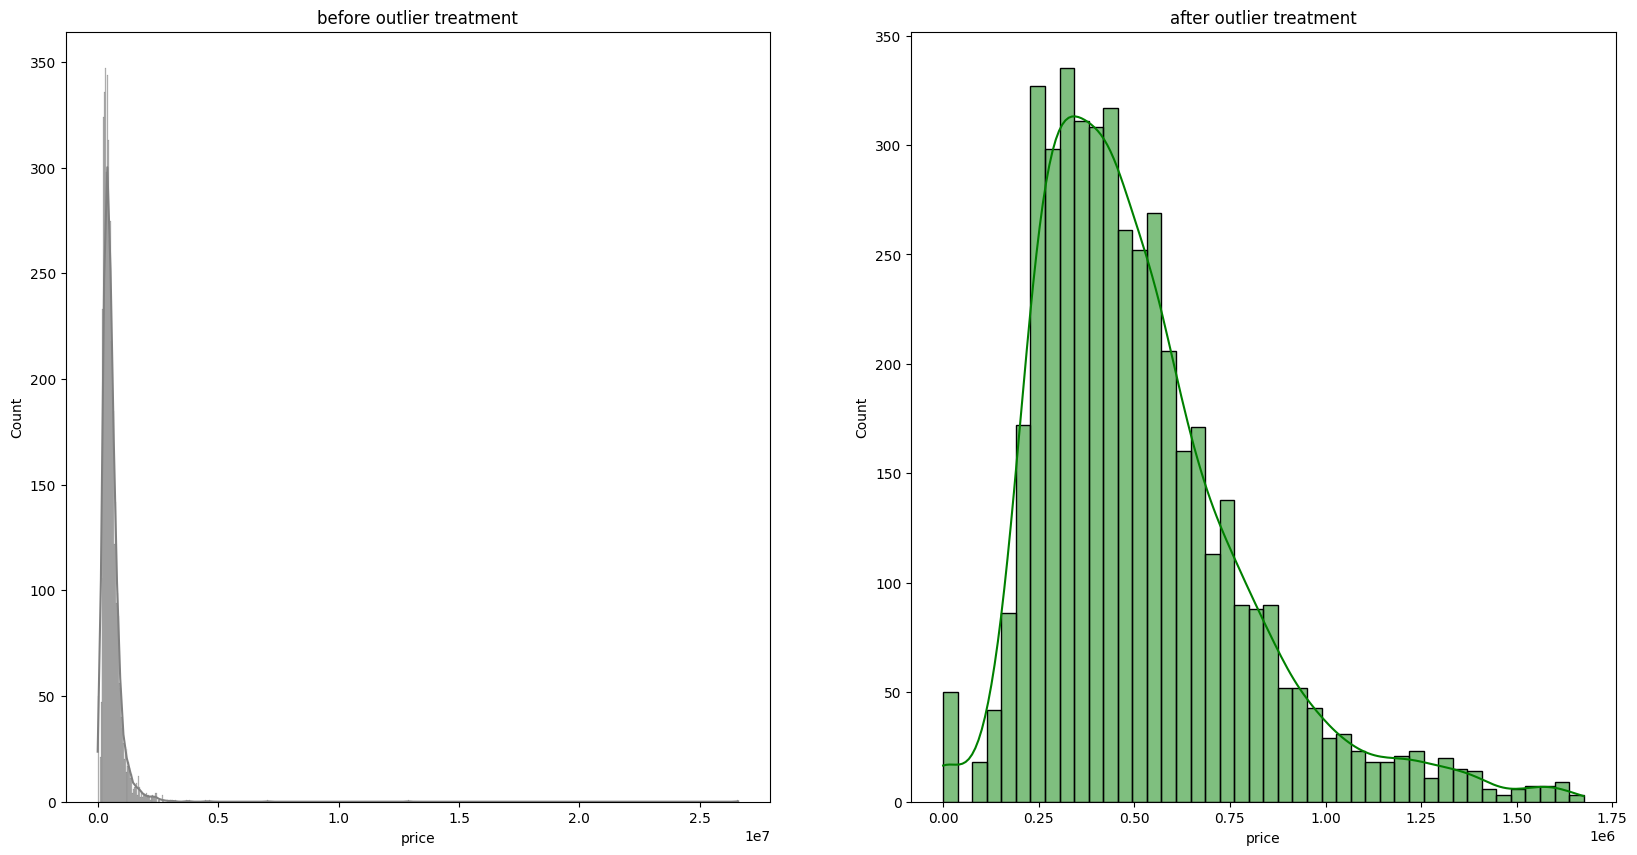

In [26]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(20,10))

sns.histplot(df['price'], kde=True, color='grey', ax=axs[0])
sns.histplot(df_no_outliers['price'], kde=True, color='green', ax=axs[1])
axs[0].set_title('before outlier treatment')
axs[1].set_title('after outlier treatment')


Both z score and IQR are effective methods for removing outliers. However, they have different strengths and weaknesses.

* **Z score** is a measure of how far a data point is from the mean, in terms of standard deviations. Outliers are typically defined as data points that are more than 3 standard deviations away from the mean. Z score is a good method for removing outliers because it is relatively insensitive to the distribution of the data. However, it can be sensitive to outliers in the tails of the distribution.
* **IQR** is a measure of the variability of a data set, based on the quartiles. Outliers are typically defined as data points that are more than 1.5 times the interquartile range (IQR) below the first quartile or above the third quartile. IQR is a good method for removing outliers because it is relatively insensitive to the shape of the distribution. However, it can be sensitive to outliers in the middle of the distribution.

The best method for removing outliers will depend on the specific data set and the goals of the analysis. If the data set is normally distributed, z score may be a better choice. If the data set is not normally distributed, IQR may be a better choice.

Here is a table that summarizes the strengths and weaknesses of z score and IQR:

| Method | Strengths | Weaknesses |
|---|---|---|
| Z score | Insensitive to the distribution of the data | Sensitive to outliers in the tails of the distribution |
| IQR | Insensitive to the shape of the distribution | Sensitive to outliers in the middle of the distribution |

Ultimately, the best way to decide which method to use is to experiment with both methods and see which one gives you the best results.

# Binning Operations

Data binning, also known as data discretization or data bucketing, is a technique used in data preprocessing that involves grouping continuous data points into smaller, discrete intervals called **bins**. Think of it as organizing your socks by color instead of their exact shade.

Here's why data binning can be useful:

**1. Simplifies data analysis:** Binning reduces the complexity of continuous data by grouping similar values together. This makes it easier to visualize patterns, calculate statistics, and build models. For example, instead of analyzing individual income values, you might group them into bins like "low", "medium", and "high" for easier analysis.

**2. Improves model performance:** In some cases, binning can improve the performance of machine learning models, particularly with simpler algorithms like decision trees. By simplifying the data, models can identify relationships and patterns more easily.

**3. Reduces noise and outliers:** Binning can smooth out minor fluctuations and errors in continuous data, making it less sensitive to outliers. This can lead to more robust and generalizable models.

**4. Reduces computational cost:** Working with binned data can be computationally cheaper than processing large amounts of continuous data, especially for complex algorithms. This can be beneficial for larger datasets or real-time applications.

However, it's important to remember that binning also has some downsides:

**1. Information loss:** Grouping data into bins inevitably loses some detail and precision. Choosing the right bin size and boundaries is crucial to minimize this loss.

**2. Potential for bias:** The choice of bin boundaries can introduce bias into your analysis. Be careful to ensure your bins are not arbitrary or biased towards specific outcomes.

**3. Not suitable for all data:** Binning is not always the best approach for all types of data. It's particularly unsuitable for data with complex or non-linear relationships.

Overall, data binning can be a valuable tool for simplifying and analyzing data, especially for model building. However, it's important to use it with caution and understand its limitations to avoid introducing bias or losing valuable information.

Feel free to ask if you have any further questions about data binning or specific examples of its applications!



In [27]:
df['yr_built'].value_counts(bins=10)

yr_built
(2002.6, 2014.0]      848
(1979.8, 1991.2]      635
(1957.0, 1968.4]      607
(1945.6, 1957.0]      549
(1991.2, 2002.6]      534
(1968.4, 1979.8]      511
(1934.2, 1945.6]      273
(1922.8, 1934.2]      259
(1899.885, 1911.4]    207
(1911.4, 1922.8]      177
Name: count, dtype: int64

<Axes: xlabel='yr_built'>

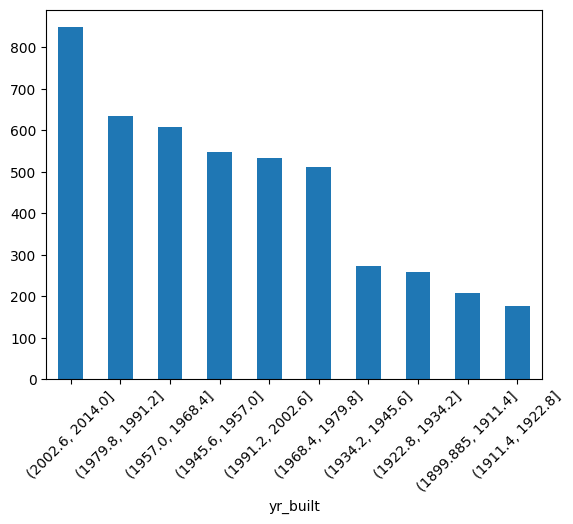

In [28]:
df['yr_built'].value_counts(bins=10).plot(kind='bar', rot=45)

In [29]:
#creating a series with 8 bins for year built values range
pd.cut(df['yr_built'], 8) 

0       (1942.75, 1957.0]
1       (1914.25, 1928.5]
2       (1957.0, 1971.25]
3       (1957.0, 1971.25]
4       (1971.25, 1985.5]
              ...        
4595    (1942.75, 1957.0]
4596    (1971.25, 1985.5]
4597    (1999.75, 2014.0]
4598    (1971.25, 1985.5]
4599    (1985.5, 1999.75]
Name: yr_built, Length: 4600, dtype: category
Categories (8, interval[float64, right]): [(1899.886, 1914.25] < (1914.25, 1928.5] < (1928.5, 1942.75] < (1942.75, 1957.0] < (1957.0, 1971.25] < (1971.25, 1985.5] < (1985.5, 1999.75] < (1999.75, 2014.0]]

In [30]:
df['house_age'] = pd.cut(df['yr_built'],3, labels=["old", "average", "new"])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,zscore-price,outliers,house_age
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864,False,average
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598,True,old
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424,False,average
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071,False,average
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482,False,average


In [33]:
import seaborn as sns
sns.boxplot(y=df[df['price']<400],x=df['house_age'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:

# Example data
data = pd.DataFrame({
    "age": np.random.randint(20, 60, size=100),
    "income": np.random.rand(100) * 100000
})

# Define custom bin boundaries for 'age'
age_bins = [20, 30, 40, 50, 60]

# Binning with cut and describe
data["age_bin"] = pd.cut(data["age"], age_bins)
print(data["age_bin"].describe())

# Binning with qcut for equal-sized bins
data["income_quartile"] = pd.qcut(data["income"], 4)  # 4 equal-sized bins
print(data.groupby("income_quartile")["income"].mean())


## <b>Encoding of Categorical Variables</b>

Let's first see what encoding is.

#### **What Is Encoding?**

Encoding is used to transform the categorical variable into numerical features. (e.g. 2 categories to boolean)

For example, we have an attribute called gender in a data set where values are male and female. In this case, the numerical encoded version of the values will be 1 for male, 0 for female, or vice versa.


Since different kinds of categorical variables capture different amount of information, we need different techniques to encode them.

### **Label Encoding**

Label encoding is a handy technique to encode categorical variables. However, such encoded nominal variables might end up being misinterpreted as ordinal.

**Pros**
- Doesn't impact distribution
- Retains all categorical variable information
- Works very well with linear models

**Cons**
- Expands the feature space. If you have many categories, you might run into a very wide dataset
- Doesn't add any extra information while encoding
- Add sparsity (a dataset with tons of zeroes which can reduce the vairance)
- Possible dummy variables may be identical

#### **Encoding Can Be Performed on the Following Types of Variables:**

#### Nominal Variables

Consider the following three categorical variables and their values:

**Color**: Blue, Green, Red, Yellow

**Educational Qualification**: Primary School, Secondary School, Graduate, Post-Graduate, PhD

**Salary Bracket**: 0-50,000, 50,001-100,000, 100,001-150,000, 150,001-200,000

Although all three of them are categorical variables, they are different in the amount of information they convey. 
Let's look at them one by one.

Color conveys blue is different from red. That's all. The value of the variable is not meant to capture any relative difference among the values. Such variables are called `Nominal Variables`.

####  Ordinal Variables

Now consider educational qualifications.

The value "graduate" does not only convey that it is different from the value say "Primary school", it also implies that it is more in terms of qualification than "Primary School". 

Such variables are called `Ordinal Variables` because they convey a sense of order.

In our example, Primary School < Secondary School < Graduate < Post-Graduate < PhD. (in terms of qualification).

#### Interval Variables 

The third variable, salary bracket is similar to educational qualification by conveying order (a person earning 50,001-100,000 earns more salary than 0-50,000). 

However, here, apart from knowing the order, we also know the interval between the values. 

Here we can say that the averages of each of the values are separated by 50,000. Such variables are called `Interval variables`.

## Techniques Used for Encoding Variables
There are two types of broadly used algorithms which perform the task of encoding of variables.


### There are few libraries required to perform encoding variables:
* Pandas - It helps to retrieve datasets, handle missing data and perform data wrangling.
* NumPy - It helps to perform numerical operations in the dataset.
* sklearn.preprocessing - It helps in data transformation.

In [2]:
import pandas as pd
import numpy as np

# Import label encoder 
from sklearn import preprocessing 

**Instruction:**

 Download the **`Iris.csv`** dataset file from Course Resources and upload it in the lab using the Up arrow as shown below on the View Tab

**Note 1:**  
* The **`iris_df`** is a dataframe that stores data imported from a CSV file in rows and columns format.
* The **head()** function helps to view the first few data present in the **`iris_df`** dataframe.

In [3]:
# Import dataset 
iris_df = pd.read_csv('Dataset/Iris.csv') 
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Observations from the above output:**
>View few records of Iris dataset


**Note 2:**  
The **info()** function helps to understand the dataset, the column name, total null values, and data type.

In [4]:
#Select the cell and click on run icon 
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Observations from the above output:**
>The variable **`species`** is a categorical Dtype **'object'**.

### Label Encoder

**Note 3:**

The **LabelEncoder()** function is used to convert categorical variables into numerical. According to our dataset, variable **`species`** is categorical, so convert **`species`** into numerical type.

In [5]:
#Select the cell and click on run icon to define LabelEnocder 
label_encoder = preprocessing.LabelEncoder() 

**Note 4:**

The **unique()** function is used to identify distinct rows present in the **`iris_df`** dataframe.

In [6]:
#Select the cell and click on run icon
iris_df['species'].unique() 

array(['setosa', 'versicolor', 'virginica'], dtype=object)

**Observations from the above output:**
>There are three categories of variable **`species`** such as *'setosa'*, *'versicolor'*, and *'virginica'* to be encoded.

**Note 5:**

* The **fit_transform()** method calculates the mean and variance of each feature and transforms all the features using the respective mean and variance.
* The **head()** function helps to view the first few data present in the **`iris_df`** dataframe.

In [7]:
iris_df['species']= label_encoder.fit_transform(iris_df['species']) 
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_df['species'].unique()

array([0, 1, 2])

**Observations from the above output:**
>The variable **`species`** is converted into numerical variable as 0, 1, & 2.

In [9]:
#Select the cell and click on run icon

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**Observations from the above output:**
>The variable **`species`** Dtype is converted to **'int64'**.

>>Using LabelEnocder, we can convert a categorical variable into a numerical variable.

## **One Hot Encoding**

A data set with more dimensions requires more parameters for the model to understand, and that means more rows to reliably learn those parameters.

The effect of using One Hot Encoder is the addition of a number of columns (dimensions).

If the number of rows in the data set is fixed, the addition of extra dimensions without adding more information for the models to learn from can have a detrimental effect on the eventual model accuracy.

If the number of rows in the dataset is fixed and the addition of extra dimension without adding more information in the model would affect the model accuracy.

In the below example, you can see that category of Variable X is enocded into separate columns such as Variable X_Blue, Variable X_Yellow, Variable X_Red.

![one_hot](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.4_Feature_Engineering/Trainer_PPT_and_IPYNB/one_hot.png)


converts categorical variables from one column into multiple numerical columns and assigns a 1/0 flag for each category.

There are few libraries required to perform **One Hot Encoding**:

* **datasets**: It helps to load the datasets from sklearn library.

* **OneHotEncoder**: It helps to encode categorical variable.

There are two ways to do this

In [1]:
#Select the cell and click on run icon
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

**Note 6:**

The given code helps to load the **Iris dataset** and create a dataframe **iris_data**, and **y** variable consists of target values.

In [2]:
#Select the cell and click on run icon
iris_data = datasets.load_iris()

iris_data = pd.DataFrame(data=np.c_[iris_data["data"], iris_data["target"]], 
                         columns=iris_data["feature_names"] + ["target"])
y = iris_data.target.values

**Note 7:**

The **head()** function is used to view the first few data present in the **`iris_data`** dataframe.

In [12]:
#Select the cell and click on run icon
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


**Observations from the above output:**
>There are four features (independent) and one target (dependent variable) present in the **`iris_data`** dataframe.


In [13]:
# view the target values
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

**Observations from the above output:**
>The variable **`target`** is converted into an array. We want to break it down into multiple columns

**Note 8:**

* In OneHotEncoder, the categories set as 'auto' determines the categories automatically.
* The **reshape()** function reshapes an array without modifying its data.
* The **toarray()** function helps to represent the data in array format.

In [17]:
#to reshape, we need to specify the shape or size of the array. but we don't know how many rows we're end up having
# so we use -1 for all rows, 1 for one column
y.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [12]:
#Select the cell and click on run icon
onehotencoder = OneHotEncoder(categories='auto')
y = onehotencoder.fit_transform(y.reshape(-1,1))
print(y.toarray())

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

**Observations from the above output:**
>With the help of above output, you can see that variable **`target`** is converted into numerical variable as 0's and 1's into three separate categories .

**Note 9:**

The **get_dummies()** function is used for data manipulation and converts categorical variable to numerical variables .

In [5]:
#Select the cell and click on run icon
pd.get_dummies(iris_data, columns=['target'] ).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_0.0,target_1.0,target_2.0
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [7]:
#[0:'setosa', 1:'versicolor', 2:'virginica']
pd.get_dummies(iris_data, columns=['target']).rename(columns={'target_0.0':'setosa'})

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,target_1.0,target_2.0
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


**Difference between pandas get_dummies and sk learn one hot encoding**
</br>
[Detailed Article About Comparison](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/#:~:text=(1)%20The%20get_dummies%20can',will%20natively%20handle%20unknown%20categories.)

- Both achieve the same results
- OneHotEncoder is recommended in the scientific community if you're builidng ML model
- get_dummies is for basic data analysis
- OneHotEncoder is more compatible with scikit-learn ML piepline for automation and production deployment
- get_dummies can’t handle unknown categories natively, you could get around this inconsistency by applying a workaround and then apply reindex

**Observations from the above output:**
>The target values are converted into dummy values in three different columns.

## <b>Grouping Operations</b>

There are two types of grouping operations:

**1. Categorical Grouping:** Grouping based on aggregate function using lambda or grouping using a pivot table.

**2. Numeric Grouping:** Grouping numerical columns using mean and sum functions.

In [5]:
#quick example
import pandas as pd
import numpy as np
data={'Candy Variety' :['Chocolate Hearts', 'Sour Jelly', 'Candy Canes', 'Sour Jelly' , 'Fruit Drops'], 'Date and Time': ['09-02-2020 14:05' , '24-10-2020 18:00', '18-12-2020 20:13', '25-10-2020 10:00', '18-10-2020 15:46'],
'Day': ['Sunday', 'Saturday', 'Friday', 'Sunday', 'Monday']
    , 'Length': [3, 3.5, 3.5, 3.5, 5.0]
    , 'Breadth': [2,2,2.5,2,3]
    , 'Price' : [7.5, 7.6, 8, 7.6, 9]}

In [2]:
df = pd.DataFrame(data)
df.dtypes

Candy Variety     object
Date and Time     object
Day               object
Length           float64
Breadth          float64
Price            float64
dtype: object

In [3]:
df['Date and Time'] = pd.to_datetime(df['Date and Time'], format="%d-%m-%Y %H:%M" )
df.head()

,Candy Variety,Date and Time,Day,Length,Breadth,Price
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,3.0,2.0,7.5
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.5,2.0,7.6
2,Candy Canes,2020-12-18 20:13:00,Friday,3.5,2.5,8.0
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.5,2.0,7.6
4,Fruit Drops,2020-10-18 15:46:00,Sunday,5.0,3.0,9.0


Approach: I want to create a new feature from days that indicate weekend or weekday

In [6]:
df['Type of Day'] = np.where(df['Day'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')
df

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Type of Day
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,3.0,2.0,7.5,Weekend
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.5,2.0,7.6,Weekend
2,Candy Canes,2020-12-18 20:13:00,Friday,3.5,2.5,8.0,Weekday
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.5,2.0,7.6,Weekend
4,Fruit Drops,2020-10-18 15:46:00,Sunday,5.0,3.0,9.0,Weekend


# Normalization and Standardization

|Feature|Normalization|Standardization|
|---|---|---|
|Purpose|To scale data to a common range|To scale data to have a mean of 0 and a standard deviation of 1|
|Range|The data will be between a certain range, such as 0 and 1|The data will have a mean of 0 and a standard deviation of 1|
|Outliers|Can help to reduce the impact of outliers|Does not affect outliers|
|Machine learning|Not always necessary|Often used with machine learning algorithms|

▶️ Normalization means adjusting values measured on different scales to a common scale, and it is required prior to training many machine learning models.

▶️ Standardization is one way of performing normalization, where we subtract the mean from each individual sample, and then divide the difference by the standard deviation. The aim of standardization is to produce variables with a mean of 0 and a variance of 1.

▶️ Standardization is also called z-score normalization. The z-score is the result of (x-mean(x))/std(x), and indicates how many standard deviations the observations differ from the mean.


### Standardization `StandardScaler()`

In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
data = np.array([[1,2],[4,6],[12,8],[4,9]])
print(data)

[[ 1  2]
 [ 4  6]
 [12  8]
 [ 4  9]]


In [2]:
scaler = StandardScaler()
scaled_date = scaler.fit_transform(data)
scaled_date

array([[-1.0403831 , -1.58525817],
       [-0.30599503, -0.09325048],
       [ 1.65237317,  0.65275337],
       [-0.30599503,  1.02575529]])

### Normalization `MinMaxScaler()`

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler2.fit_transform(data)
scaled_data2

array([[0.        , 0.        ],
       [0.27272727, 0.57142857],
       [1.        , 0.85714286],
       [0.27272727, 1.        ]])

---
See if you want to stop here and pivot to EDA

## <b>Problem Statements:</b>

You work in HR analytics. You have been given a task to predict the employees who are going to leave the organinzation, so that their replacement process can be started within the available time frame. 

The dataset is created by IBM data scientists to uncover the factors that lead to employee attrition and 
explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or 
‘compare average monthly income by education and attrition’. 

The name of the dataset attributes are self explanatory. Some required attributes are explained below.

* Education
   * Below College
   * College
   * Bachelor
   * Master
   * Doctor


* EnvironmentSatisfaction
    * Low
    * Medium
    * High
    * Very High


* JobInvolvement
    * Low
    * Medium
    * High
    * Very High


* JobSatisfaction
   * Low
   * Medium
   * High
   * Very High


* PerformanceRating
   * Low
   * Good
   * Excellent
   * Outstanding


* RelationshipSatisfaction
  * Low
  * Medium
  * High
  * Very High


* WorkLifeBalance
  * Bad
  * Good
  * Better
  * Best

### There are few libraries required to perform encoding variables:
* pandas - It helps to retrieve datasets, handle missing data and in data wrangling.
* Numpy - It helps to perform numerical operations in the dataset.
* seaborn and matplotlib- It helps to data visualization.
* warnings - It helps to segregate the warnings.

### Import libraries

In [21]:
#Select the cell and click on run icon
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Instruction:**

Download the **`HR-Employee-Attrition.csv`** dataset file from Course Resources and upload it in the lab using Up arrow shown below View Tab

### Read the dataset

**Note 16:**  
* The **`df`** is dataframe to store the data imported from the csv as rows and columns table format.
* The **head()** function helps to view first few data present in the **`df`** dataframe.

In [49]:
#Select the cell and click on run icon
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Note 17:**

The **columns** provides the name of the columns present in the **`df`** dataframe.

In [50]:
#Select the cell and click on run icon
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Observations we can draw from the above output:**
>It denotes the name of the columns present in the **`df`** dataframe.

**Note 18:**

The **shape** represents the number of elements in each dimension and returns a tuple with each index having the number of corresponding elements.

In [51]:
#Select the cell and click on run icon
df.shape

(1470, 35)

**Observations we can draw from the above output:**

> There are 1470 rows and 35 columns present in the **`df`** dataframe.

### Check if there are any null values

In [52]:
#Select the cell and click on run icon
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Observations:**

>There are no null values present in the **`df`** dataframe.

### Now, print the count of values for each column

In [26]:
for i in df.columns:
    print (i , ":", df[i].value_counts())
    print (" _ "*40)
    print (" _ "*40)

Age : 35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
Attrition : No     1233
Yes     237
Name: Attrition, dtype: int64
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
BusinessTravel : Travel_Rarely   

**Observations we can draw from the above output:**


>It is an imbalanced data as value count in `attrition` column is imbalanced.
>>`Over18` is `Y` (Yes) across all the employees and it is not beneficial for further use.
>>>`StandardHours` is 80 which is common for all and it is not beneficial for further use.
>>>>`EmployeeCount`, `EmployeeNumber` are unique which are also not going to help us predict our end result.

### Now, print the unique values in each column to understand the above output more clearly

In [27]:
for i in df.columns:
    print (i , ":", df[i].unique())
    print (" _ "*40)
    print (" _ "*40)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
Attrition : ['Yes' 'No']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
DailyRate : [1102  279 1373 1392  591 1005 

**Note 19:**

The **drop()** function helps to drop the columns which are not important features in the dataset.

In [28]:
df=df.drop(['Over18','EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

**Note 20:**

After dropping, check the number of columns and rows present in the dataset.  

In [29]:
df.shape

(1470, 31)

**Note 21:**

The **columns** provides the name of the columns present in the **`df`** dataframe.

In [30]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

**Observations from the above output:**
>We can see a lot columns which deal with satisfaction, let's observe them closely.

In [31]:
df[['RelationshipSatisfaction','JobSatisfaction','EnvironmentSatisfaction','JobInvolvement']]

,RelationshipSatisfaction,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement
0,1,4,2,3
1,4,2,3,2
2,2,3,4,2
3,3,3,4,3
4,4,2,1,3
...,...,...,...,...
1465,3,4,3,4
1466,1,1,4,2
1467,2,2,2,4
1468,4,2,4,2


**Observations from the above output:**
>All the satisfactions are measured from 1 to 4 in incremental order, along with WorkLifeBalance.
>>Higher the value, higher the satisfaction.
>>>So, we can combine all the columns that convey satisfaction detail and make them one.

**Note 22:**

Let us now calculate the mean of all the types of satisfaction. Based on a condition if the mean value is greater than 2.35 then it returns one else zero

In [32]:
df['TotalSatisfaction_mean'] = (df['RelationshipSatisfaction']  + df['EnvironmentSatisfaction'] 
                                + df['JobSatisfaction'] + df['JobInvolvement'] + df['WorkLifeBalance'])/5

def Satif(df) : 
    if  df['TotalSatisfaction_mean'] > 2.35 :
        return 1
    else : 
        return 0
    
    
df['Satif'] = df.apply(lambda df:Satif(df) ,axis = 1)
df['Satif']

0       0
1       1
2       1
3       1
4       1
       ..
1465    1
1466    0
1467    1
1468    1
1469    1
Name: Satif, Length: 1470, dtype: int64

In [33]:
df.shape

(1470, 33)

Let's keep all the columns for now.

**Note 23:**

Let us now create a separate column for job satisfaction.

In [34]:
df['JobSatisf_mean'] = (df['JobSatisfaction'] + df['JobInvolvement']) / 2

In [35]:
df.shape

(1470, 34)

**Note 24:**

We can understant people who switch companies frequently have more tendency to leave a company. So lets create a new column called `MovingPeople`.

In [36]:
def MovingPeople(df) :
    if df['NumCompaniesWorked'] > 4:
        return 1
    else:
        return 0
df['MovingPeople'] = df.apply(lambda df:MovingPeople(df), axis = 1)
df['MovingPeople']

0       1
1       0
2       1
3       0
4       1
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: MovingPeople, Length: 1470, dtype: int64

In [37]:
df.shape

(1470, 35)

**Note 25:**

Create a column using `DistanceFromHome` column

In [38]:
def LongDis(df) : 
    if  df['DistanceFromHome'] > 11:
        return 1
    else : 
        return 0
df['LongDis'] = df.apply(lambda df:LongDis(df) ,axis = 1)
df['LongDis']

0       0
1       0
2       0
3       0
4       0
       ..
1465    1
1466    0
1467    0
1468    0
1469    0
Name: LongDis, Length: 1470, dtype: int64

**Note 26:**

Create a column using `TrainingTimesLastYear` column

In [39]:
def MiddleTraining(df) :
    if df['TrainingTimesLastYear'] >= 3 and df['TrainingTimesLastYear'] <= 6:
        return 1
    else:
        return 0
df['MiddleTraining'] = df.apply(lambda df:MiddleTraining(df) ,axis = 1)

**Note 27:**

Create a column to view number of years worked in each company

In [40]:
df['Time_in_each_comp'] = (df['Age'] - 20) / ((df)['NumCompaniesWorked'] + 1)
df['Time_in_each_comp']

0        2.333333
1       14.500000
2        2.428571
3        6.500000
4        0.700000
          ...    
1465     3.200000
1466     3.800000
1467     3.500000
1468     9.666667
1469     4.666667
Name: Time_in_each_comp, Length: 1470, dtype: float64

In [41]:
df.shape

(1470, 38)

**Note 28:**

Let us now understand the columns that are categorical and numerical in the *`df`* dataframe.


In [42]:
numeric_df= df.select_dtypes(include=[np.number])

categoric_df=df.select_dtypes(exclude=[np.number])

In [43]:
numericcol=numeric_df.columns.tolist()
categorycol=categoric_df.columns.tolist()

print ("Category :",categorycol)
print ("\n Numeric :",numericcol)

Category : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

 Numeric : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalSatisfaction_mean', 'Satif', 'JobSatisf_mean', 'MovingPeople', 'LongDis', 'MiddleTraining', 'Time_in_each_comp']


**Observations from the above output:**
>'DailyRate', 'HourlyRate' can be dropped as we have monthly rate
>>Attributes 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',  'JobSatisfaction',  'NumCompaniesWorked', 'RelationshipSatisfaction', and 'TrainingTimesLastYear' can be removed as these are considered in newly created column attributes

**Note 29:**

Let us now drop unnecessary columns present in the *`df`* dataframe.

In [44]:
df=df.drop(['DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement',  
            'JobSatisfaction',  'NumCompaniesWorked', 
            'RelationshipSatisfaction', 'TrainingTimesLastYear'],axis=1)

In [45]:
df.shape

(1470, 29)

**Note 30:**

After extracting the important features from the dataframe.Now, we can convert the categorical features into numerical using **one hot encoding technique**.

In [46]:
data = pd.get_dummies(df, columns=categorycol, drop_first=True)
print(data.columns)
print(data.shape)

Index(['Age', 'Education', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalSatisfaction_mean', 'Satif', 'JobSatisf_mean', 'MovingPeople',
       'LongDis', 'MiddleTraining', 'Time_in_each_comp', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Rep

In [47]:
data.head()

,Age,Education,JobLevel,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,2,2,5993,19479,11,3,0,8,1,...,0,0,0,0,0,1,0,0,1,1
1,49,1,2,5130,24907,23,4,1,10,3,...,0,0,0,0,1,0,0,1,0,0
2,37,2,1,2090,2396,15,3,0,7,3,...,1,0,0,0,0,0,0,0,1,1
3,33,4,1,2909,23159,11,3,0,8,3,...,0,0,0,0,1,0,0,1,0,1
4,27,1,1,3468,16632,12,3,1,6,3,...,1,0,0,0,0,0,0,1,0,0


**Observations from the above output:**
> We can see that all the variables present in the dataframe are in the numerical format.

`Note: The rest of the encoding methods will be used in further lessons`

### The further operations come under feature Selection

**Note: In this lesson, we saw the use of the feature engineering methods, but in the next lesson we are going to use one of these methods as a sub component for "Exploratory Data Analysis".**